In [2]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [41]:
titantic = pd.read_csv('titanic.txt')
titantic.head()

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male


In [29]:
print titantic.head()[['pclass', 'survived', 'age', 'embarked', 'boat', 'sex']]

  pclass  survived      age     embarked   boat     sex
0    1st         1  29.0000  Southampton      2  female
1    1st         0   2.0000  Southampton    NaN  female
2    1st         0  30.0000  Southampton  (135)    male
3    1st         0  25.0000  Southampton    NaN  female
4    1st         1   0.9167  Southampton     11    male

[5 rows x 6 columns]


In [30]:
# for any column in cols, it converts the one column to multiple columns
# for example column name - sex, values Female, Male
# it converts to two columns, sex=female, sex=male
from sklearn import feature_extraction
def one_hot_dataframe(data, cols, replace=True):
    vec = feature_extraction.DictVectorizer()
    vecData = pd.DataFrame(vec.fit_transform(data[cols].to_dict(outtype='records')).toarray())
    vecData.columns = vec.get_feature_names()
    vecData.index = data.index
    if replace:
        data = data.drop(cols, axis=1)
        data = data.join(vecData)
    return (data, vecData, vec)

In [43]:
titantic, titanic_n, vec = one_hot_dataframe(titantic, ['pclass','embarked','sex','home.dest','room','ticket','boat'], replace=True)

In [44]:
titantic.shape

(1313, 581)

In [42]:
# Fill N/A values
mean = titantic['age'].mean()
titantic['age'].fillna(mean, inplace=True)
titantic.fillna(0, inplace=True)
titantic.head()

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,0,0,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,0,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,0,0,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,0,11,male


In [45]:
# split into Train and Test
from sklearn.cross_validation import train_test_split
titanic_target = titantic['survived']
titanic_data = titantic.drop(['name', 'row.names','survived'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(titanic_data, titanic_target,test_size=0.25,random_state=33)

In [47]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt = dt.fit(X_train, y_train)
from sklearn import metrics
y_perd = dt.predict(X_test)
print "Accuracy: {0:.3f}".format(metrics.accuracy_score(y_test, y_perd)), "\n"

Accuracy: 0.836 



### Features Selection
Find out the most relative features and use them for building model

In [48]:
from sklearn import feature_selection

fs = feature_selection.SelectPercentile(
        feature_selection.chi2, percentile=20)
X_train_fs = fs.fit_transform(X_train, y_train)

In [49]:
dt.fit(X_train_fs, y_train)
X_test_fs = fs.transform(X_test)
y_pred_fs = dt.predict(X_test_fs)
print "Accuracy: {0:.3f}".format(metrics.accuracy_score(y_test, y_perd)), "\n"

Accuracy: 0.836 



In [53]:
print X_test.shape

(329, 578)


In [52]:
print X_test_fs.shape

(329, 115)


In [55]:
# try to find the optimal number of features
from sklearn import cross_validation
percentiles = range(1,100,5)
results = []
for i in range(1,100,5):
    fs = feature_selection.SelectPercentile(
            feature_selection.chi2, percentile=i)
    x_train_fs = fs.fit_transform(X_train, y_train)
    scores = cross_validation.cross_val_score(dt, x_train_fs, y_train, cv=5)
    results = np.append(results, scores.mean())
optimal_percentil = np.where(results == results.max())[0]
print "Optimal number of features:{0}".format(
    percentiles[optimal_percentil]), "\n"

Optimal number of features:6 



/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:13: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


In [56]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


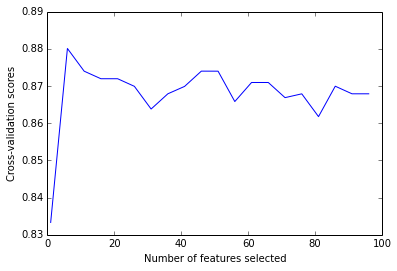

In [57]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation scores")
plt.plot(percentiles, results)
